# C2 HW -- Online Retail dataset from UCI

In [ ]:
# https://archive.ics.uci.edu/ml/datasets/online+retail
# 541909 data rows

In [ ]:
# Python packages to consider openpyxl, datetime, numpy, pandas, matplotlib, bokeh, etc.

# Homework: We want to find business seasonality. 
## HW)
## Plot a graph with months (12) on x-axis and total monthly sales on y-axis.
## Provide the title and label both axes.
## Make reasonable assumptions as you process the dataset.
## Select Python packages to help with your analysis.

In [30]:
# Your code here ...
# import from excel to pandas df
import pandas as pd
df = pd.read_excel('Online Retail.xlsx')

In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [39]:
df.columns.values


array(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'], dtype=object)

In [41]:
# let's drop unnecessary columns
df.drop(['InvoiceNo', 'StockCode', 'Description',  'CustomerID', 'Country'], axis=1, inplace=True)
df.columns.values

array(['Quantity', 'InvoiceDate', 'UnitPrice'], dtype=object)

In [42]:
# create a new column called subtotal
df['SubTotal'] = df['Quantity']*df['UnitPrice']
df.head()

,Quantity,InvoiceDate,UnitPrice,SubTotal
0,6,2010-12-01 08:26:00,2.55,15.30
1,6,2010-12-01 08:26:00,3.39,20.34
2,8,2010-12-01 08:26:00,2.75,22.00
3,6,2010-12-01 08:26:00,3.39,20.34
4,6,2010-12-01 08:26:00,3.39,20.34


In [45]:
df2 = df.groupby(['InvoiceDate']).sum()

In [46]:
df2.drop(['Quantity','UnitPrice'],axis=1,inplace=True)
df2.head()

,SubTotal
InvoiceDate,
2010-12-01 08:26:00,139.12
2010-12-01 08:28:00,22.20
2010-12-01 08:34:00,348.78
2010-12-01 08:35:00,17.85
2010-12-01 08:45:00,855.86


In [77]:
dfday = df2.groupby(pd.Grouper(freq='D')).sum() # found Grouper. This'll do the trick

In [78]:
dfday.head()

,SubTotal
InvoiceDate,
2010-12-01,58635.56
2010-12-02,46207.28
2010-12-03,45620.46
2010-12-04,0.00
2010-12-05,31383.95


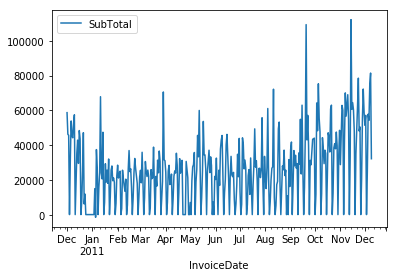

In [79]:
dfday.plot()

In [56]:
# daily shows too much noise, let's try monthly
dfmonth = df2.groupby(pd.Grouper(freq='M')).sum()

In [58]:
dfmonth.head()

,SubTotal
InvoiceDate,
2010-12-31,748957.020
2011-01-31,560000.260
2011-02-28,498062.650
2011-03-31,683267.080
2011-04-30,493207.121


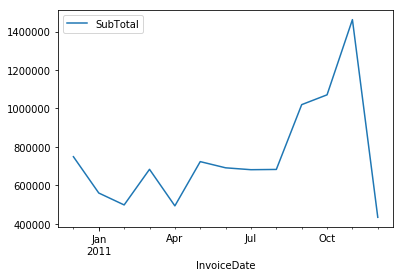

In [69]:
dfmonth.plot()

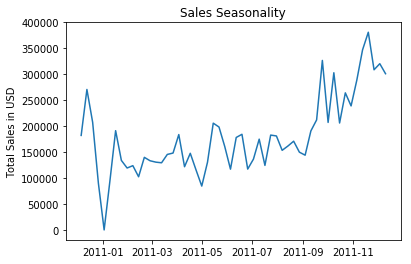

In [76]:
# monthly just doesn't look all that good. let's try weekly
dfweek = df2.groupby(pd.Grouper(freq='W')).sum()
plt.plot(dfweek)
plt.ylabel('Total Sales in USD')
plt.title('Sales Seasonality')
plt.show()

## HW2)
## Write a 3 line executive summary from the visual in HW1.


In [ ]:
# Exec summary ...
'''
Using Global Sales Data, we are able to show that there is seasonality in the sales
We summed up all weekly sales data across all regions and removed noise by plotting weekly intervals
Our graph clearly show Sales increasing starting in Novemeber and peaking in December. It then dips to a low point in January.

'''



## HW3)
## Document your assumptions ...



In [ ]:
# Your assumptions ...
'''Our assumptions are
1) Seasonality is equal across all regions
2) All sales data is in USD
''' 
